## Step 1 Importing Libraries and Data Wrangling/Cleaning

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

df = pd.read_csv('2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
School DBN                     212331 non-null object
School Name                    212331 non-null object
School Level                   212331 non-null object
Regents Exam                   212321 non-null object
Year                           212331 non-null int64
Total Tested                   212331 non-null int64
Mean Score                     212331 non-null object
Number Scoring Below 65        212331 non-null object
Percent Scoring Below 65       212331 non-null object
Number Scoring 65 or Above     212331 non-null object
Percent Scoring 65 or Above    212331 non-null object
Number Scoring 80 or Above     212331 non-null object
Percent Scoring 80 or Above    212331 non-null object
Number Scoring CR              212331 non-null object
Percent Scoring CR             212331 non-null object
dtypes: int64(2), object(13)
memory usage: 24.3+ MB


In [4]:
#check for null values
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Regents Exam    10
dtype: int64

In [5]:
#Remove all null, and filter out all  S value rows
df2=df[(df['Mean Score'] != 's')]
df2=df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137101 entries, 1 to 212325
Data columns (total 15 columns):
School DBN                     137101 non-null object
School Name                    137101 non-null object
School Level                   137101 non-null object
Regents Exam                   137101 non-null object
Year                           137101 non-null int64
Total Tested                   137101 non-null int64
Mean Score                     137101 non-null object
Number Scoring Below 65        137101 non-null object
Percent Scoring Below 65       137101 non-null object
Number Scoring 65 or Above     137101 non-null object
Percent Scoring 65 or Above    137101 non-null object
Number Scoring 80 or Above     137101 non-null object
Percent Scoring 80 or Above    137101 non-null object
Number Scoring CR              137101 non-null object
Percent Scoring CR             137101 non-null object
dtypes: int64(2), object(13)
memory usage: 16.7+ MB


In [14]:
# Convert columns to numeric for plotting and analysis
df3=df2[['Total Tested','Mean Score','Number Scoring Below 65','Percent Scoring Below 65',
     'Number Scoring 65 or Above','Percent Scoring 65 or Above',
     'Number Scoring 80 or Above','Percent Scoring 80 or Above',]].apply(pd.to_numeric)
df3['Year'] = df2['Year'].astype(str)
df3['School DBN'] = df2['School DBN']
df3['School Name']= df2['School Name']
df3['School Level'] = df2['School Level']
df3['Regents Exam'] = df2['Regents Exam']
df3.head()

,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Year,School DBN,School Name,School Level,Regents Exam
1,16,77.9,1,6.3,15,93.8,7,43.8,2015,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment
2,9,74.0,1,11.1,8,88.9,2,22.2,2016,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment
5,9,67.4,3,33.3,6,66.7,0,0.0,2015,01M140,P.S. 140 Nathan Straus,K-8,Living Environment
6,15,72.6,2,13.3,13,86.7,5,33.3,2016,01M140,P.S. 140 Nathan Straus,K-8,Living Environment
7,9,64.4,5,55.6,4,44.4,1,11.1,2017,01M140,P.S. 140 Nathan Straus,K-8,Living Environment


## Selected PS34 as my school 

In [15]:
# I have selected PS34 as the school because it was the school that I went to 
ps34 =df3[df3['School DBN'] == '01M034']
ps34.describe()
ps34

,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Year,School DBN,School Name,School Level,Regents Exam
1,16,77.9,1,6.3,15,93.8,7,43.8,2015,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment
2,9,74.0,1,11.1,8,88.9,2,22.2,2016,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment
19480,16,77.9,1,6.3,15,93.8,7,43.8,2015,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment
19481,9,74.0,1,11.1,8,88.9,2,22.2,2016,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment
54237,10,78.8,0,0.0,10,100.0,5,50.0,2015,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment
102881,7,78.0,0,0.0,7,100.0,3,42.9,2015,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment
102882,9,77.9,1,11.1,8,88.9,4,44.4,2015,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment
139886,6,80.0,0,0.0,6,100.0,3,50.0,2015,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment
139888,6,75.5,1,16.7,5,83.3,3,50.0,2015,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment
139892,6,73.5,0,0.0,6,100.0,1,16.7,2016,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment


## Analysis and Graphs

,count,mean,std,min,25%,50%,75%,max
Regents Exam,,,,,,,,
Living Environment,1008.0,77.443948,9.487644,40.0,72.1,78.8,84.3,96.8


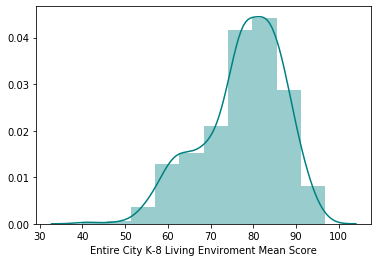

In [16]:
# created a dataframe to store all the Living environment test score for the entire city in grade level K-8 
Le=df3[(df3['Regents Exam'] == 'Living Environment') & (df3['School Level'] == 'K-8')]
sns.distplot(Le['Mean Score'], bins = 10, axlabel = 'Entire City K-8 Living Enviroment Mean Score', color="teal")
Le.groupby(Le['Regents Exam'])['Mean Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Regents Exam,,,,,,,,
Living Environment,10.0,76.75,2.298429,73.5,74.375,77.9,77.975,80.0


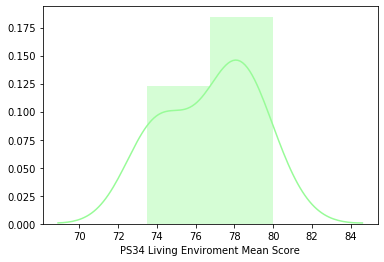

In [17]:
#dist graph
sns.distplot(ps34['Mean Score'], bins = 2, axlabel = 'PS34 Living Enviroment Mean Score', color="palegreen")
ps34.groupby(ps34['Regents Exam'])['Mean Score'].describe()

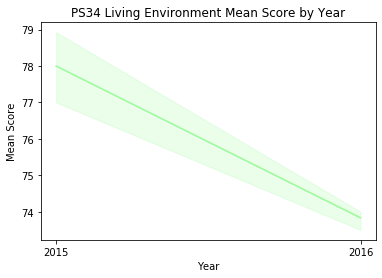

In [23]:
#PS34 living environment trend by year
plt.title('PS34 Living Environment Mean Score by Year')
plt.xlabel('categories')
plt.ylabel('values')
sns.lineplot(x = 'Year', y = 'Mean Score',data=ps34, color="palegreen")

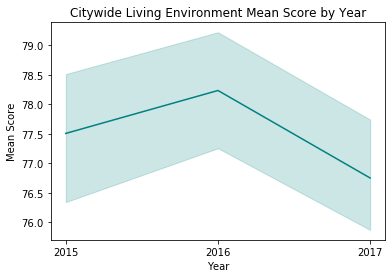

In [22]:
#citwide living environment trend by year
plt.title('Citywide Living Environment Mean Score by Year')
plt.xlabel('categories')
plt.ylabel('values')
sns.lineplot(x = 'Year', y = 'Mean Score',data=Le, color="teal")

,Regents Exam,count,mean,std,min,25%,50%,75%,max
0,Algebra2/Trigonometry,5432.0,56.370471,13.338280,19.1,47.175,55.3,64.4,95.2
4,Common Core Geometry,9546.0,59.111481,10.100504,27.0,52.000,58.0,65.6,92.1
6,Geometry,4347.0,61.881504,10.742855,29.0,54.300,61.3,68.9,95.1
11,Physical Settings/Earth Science,10397.0,63.547254,11.804745,27.1,55.600,62.5,70.8,96.8
2,Common Core Algebra2,4358.0,63.585865,9.313523,33.6,57.100,63.5,69.7,90.9
10,Physical Settings/Chemistry,6360.0,64.139135,9.741521,30.2,57.600,63.9,70.4,93.5
7,Global History and Geography,14713.0,64.171868,10.640429,28.7,56.900,62.7,70.6,97.0
8,Integrated Algebra,6308.0,64.814933,7.065440,36.7,60.300,64.4,68.8,95.9
5,English,6784.0,65.769015,9.982544,30.7,58.975,66.0,72.1,95.1
12,Physical Settings/Physics,2993.0,66.545673,12.290839,20.8,59.200,67.7,75.5,94.3


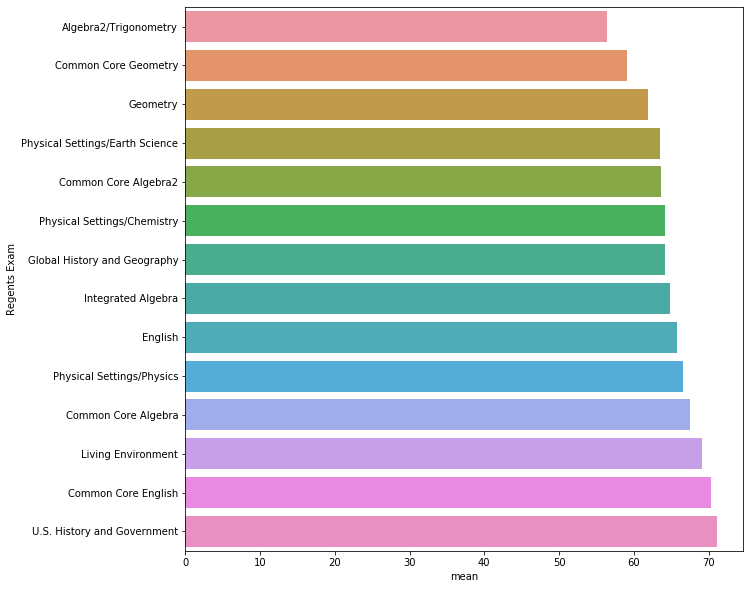

In [95]:
#graph of overall mean score of all the regent exams 
plt.figure(figsize=(10,10))
df_regent= df3.groupby(df3['Regents Exam'])['Mean Score'].describe()
df_regent= df_regent.reset_index()
df_regent= df_regent.sort_values('mean')
sns.barplot('mean','Regents Exam',data=df_regent)
df_regent